In [12]:
import pandas as pd
column_names=["Cement","BFS","FLA","Water","sp","CA","FA","Age","CCS"]
dataset=pd.read_excel("Concrete_data.xlsx",names=column_names)

In [13]:
dataset.to_excel("final_dataset.xlsx")

In [20]:
import seaborn as sns
sns.set(style="dark",
#         color_codes=["red","blue","black","grey","white","orange","pink","green","brown"]
       )

<AxesSubplot:>

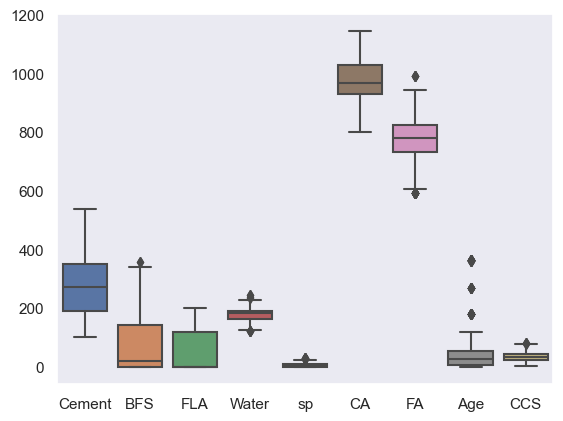

In [21]:
sns.boxplot(data=dataset)

<AxesSubplot:>

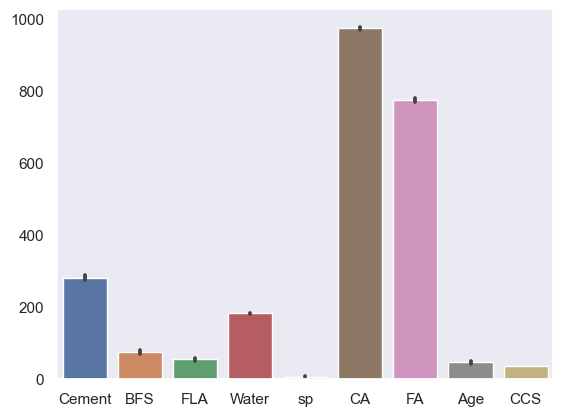

In [22]:
sns.barplot(data=dataset)

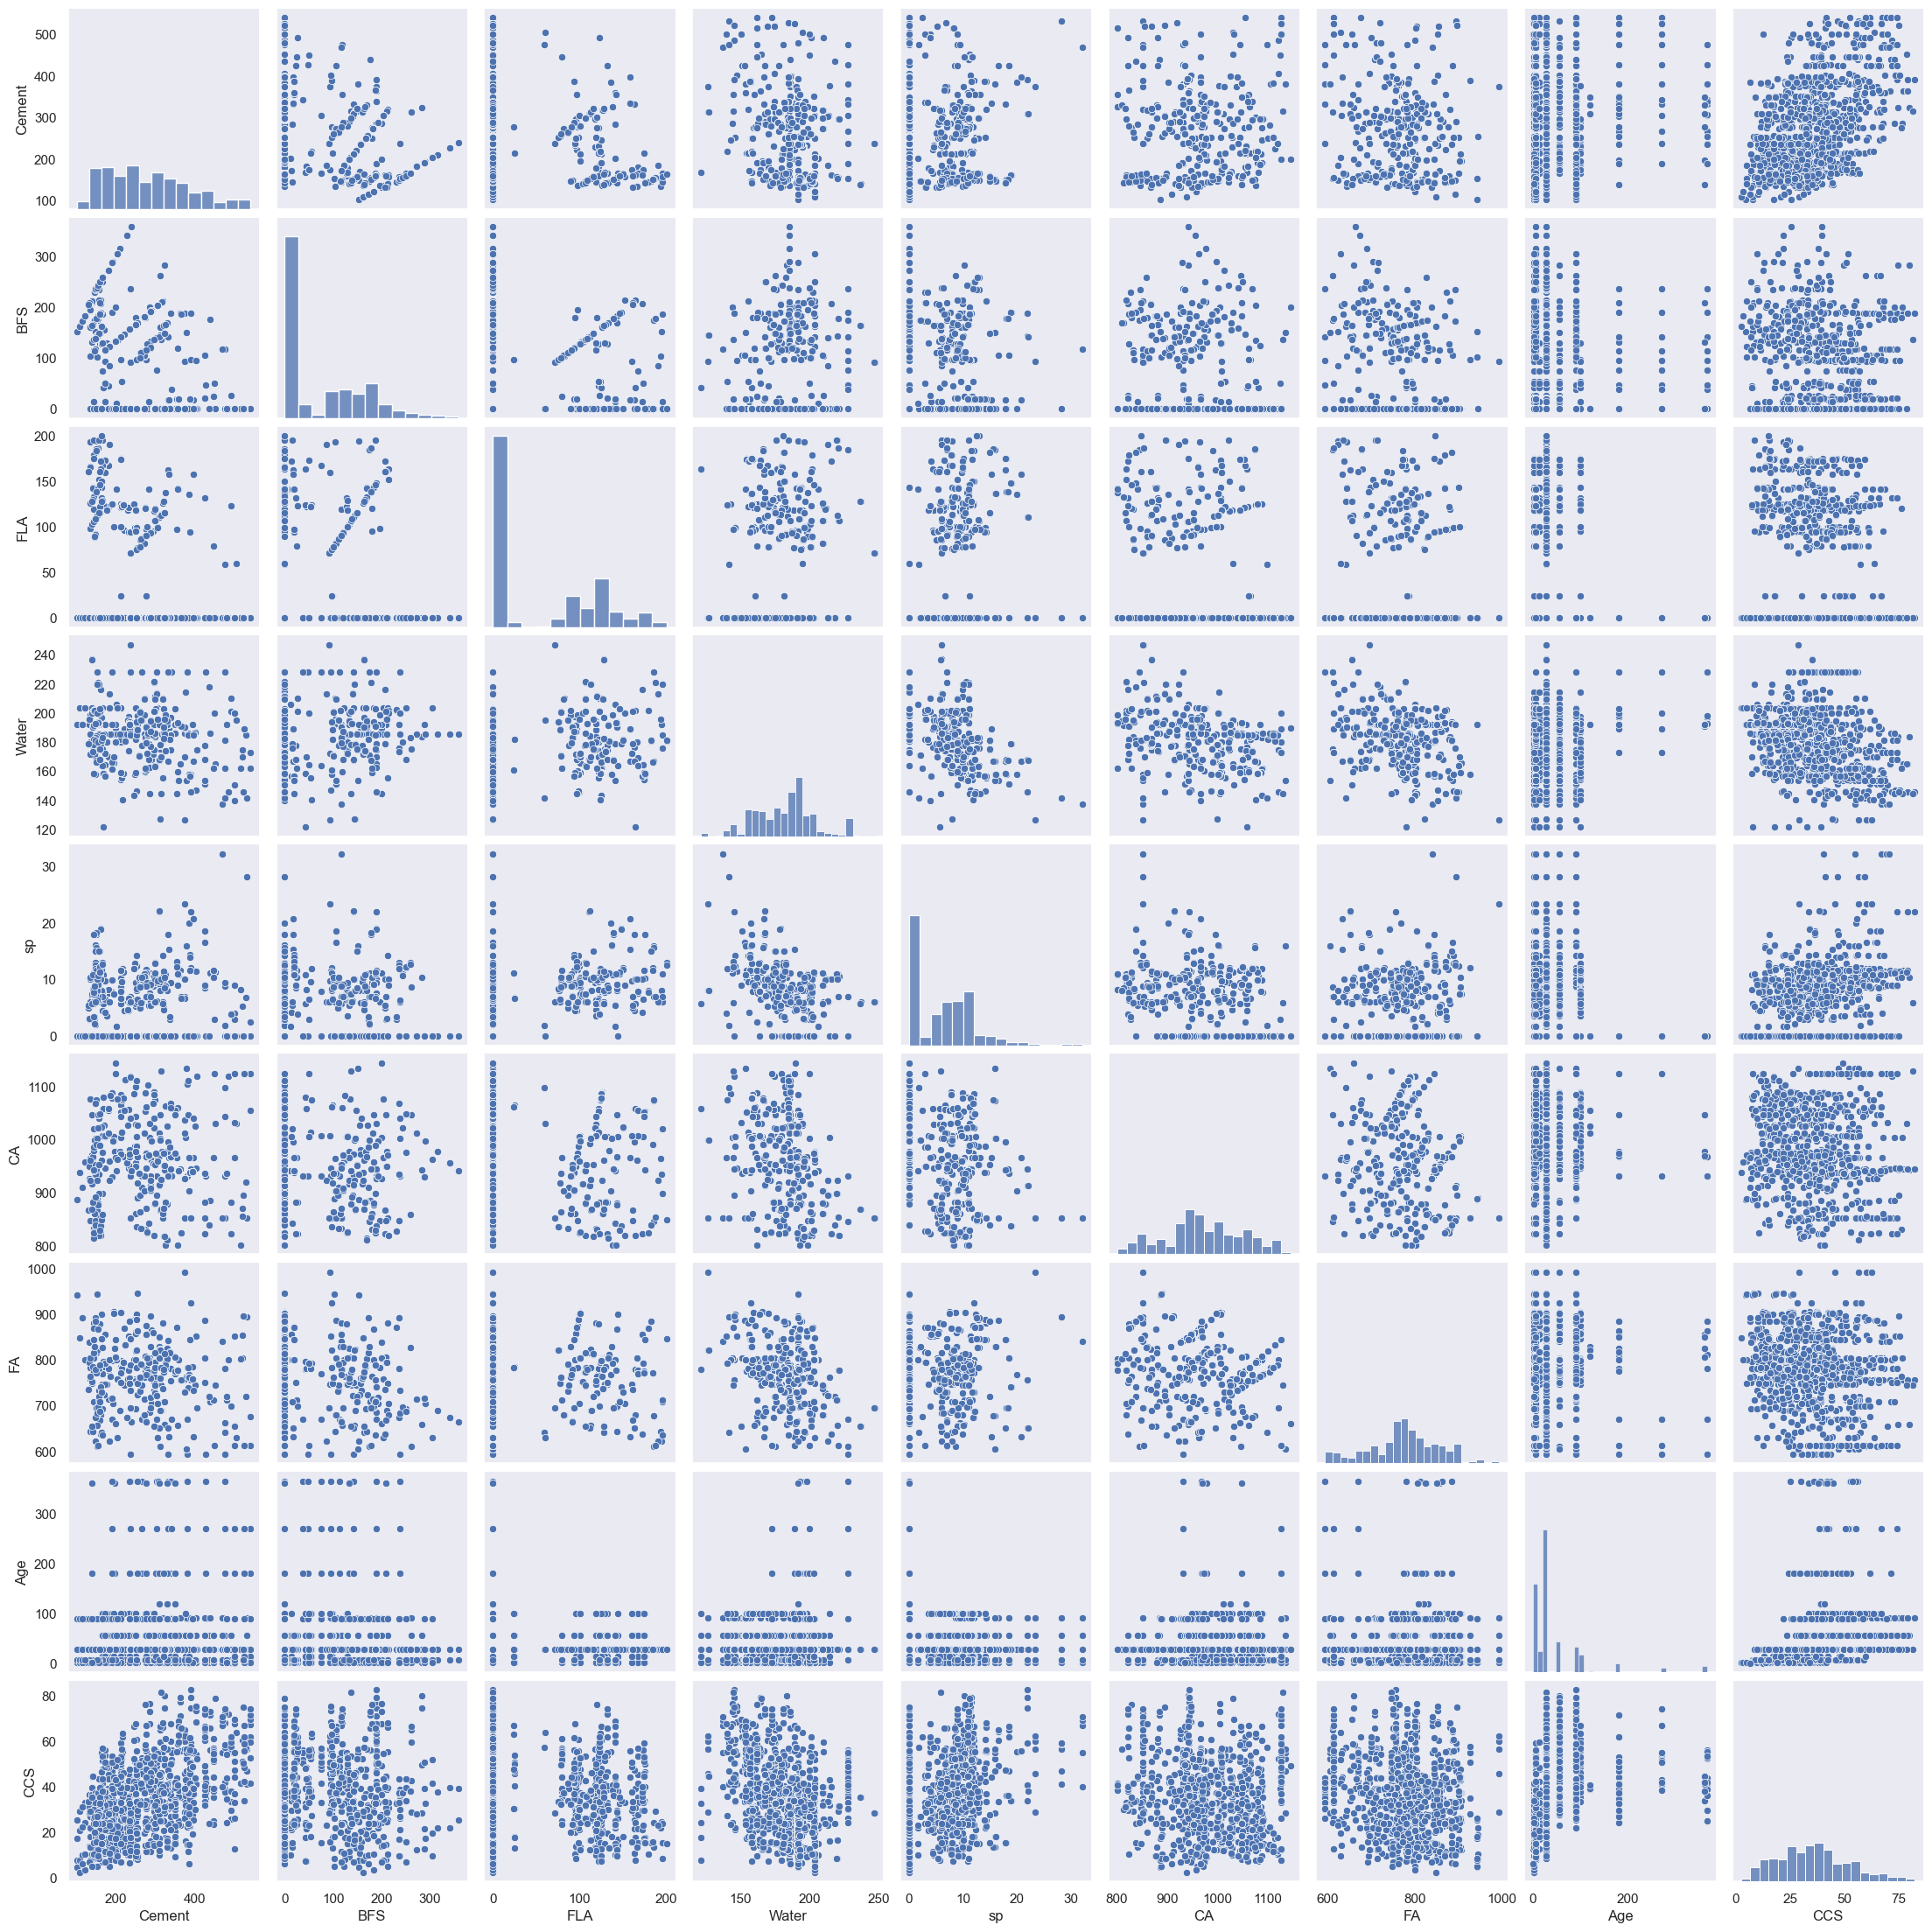

In [23]:
sns.pairplot(data=dataset)

In [25]:
import numpy as np
mean=np.mean(dataset["Water"])
print(mean)

181.58537414965974


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(dataset))

MinMaxScaler()


In [40]:
scaled_dataset=scaler.fit_transform(dataset)

In [41]:
scaled_dataset=pd.DataFrame(scaled_dataset,columns=column_names)
scaled_dataset.head(10)

,Cement,BFS,FLA,Water,sp,CA,FA,Age,CCS
0,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
1,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
3,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806
4,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.244505,0.556864
5,0.634703,0.264329,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.515358
6,0.634703,0.264329,0.0,0.848303,0.00000,0.380814,0.000000,0.074176,0.425029
7,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.074176,0.542219
8,0.851598,0.000000,0.0,0.848303,0.00000,0.380814,0.000000,0.074176,0.460436
9,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.244505,0.445292


In [42]:
scaled_dataset.describe()

,Cement,BFS,FLA,Water,sp,CA,FA,Age,CCS
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.408480,0.205808,0.271063,0.477728,0.192755,0.499574,0.450762,0.122745,0.416646
std,0.238004,0.240095,0.319866,0.170517,0.185568,0.226057,0.201095,0.173621,0.207517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205479,0.000000,0.000000,0.344511,0.000000,0.380814,0.347717,0.016484,0.266170
50%,0.389954,0.061213,0.000000,0.504990,0.197205,0.485465,0.465881,0.074176,0.399491
75%,0.566210,0.397885,0.591054,0.560878,0.315528,0.663953,0.577020,0.151099,0.543284
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

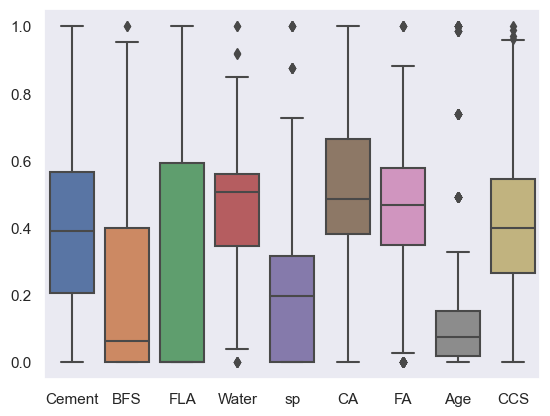

In [43]:
sns.boxplot(data=scaled_dataset)

In [44]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(scaled_dataset.iloc[:,:8])
y=pd.DataFrame(scaled_dataset.iloc[:,8])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor="loss",patience=5)
batchsize=5
model=Sequential([
                Dense(units=20,
                      input_dim=8,
                      activation="relu"),
                Dense(units=10,activation="relu"),
                Dense(units=10,activation="relu"),
                Dense(units=1,activation="linear")
                 ])
model.compile(optimizer="Adam",loss="mean_squared_error",metrics=['Accuracy'])
model.fit(x_train,y_train,epochs=100,
          batch_size=batchsize,
          callbacks=[callbacks],
          verbose=2)

Epoch 1/100
165/165 - 1s - loss: 0.0296 - Accuracy: 0.0024 - 657ms/epoch - 4ms/step
Epoch 2/100
165/165 - 0s - loss: 0.0195 - Accuracy: 0.0024 - 288ms/epoch - 2ms/step
Epoch 3/100
165/165 - 0s - loss: 0.0172 - Accuracy: 0.0024 - 288ms/epoch - 2ms/step
Epoch 4/100
165/165 - 0s - loss: 0.0156 - Accuracy: 0.0024 - 308ms/epoch - 2ms/step
Epoch 5/100
165/165 - 0s - loss: 0.0142 - Accuracy: 0.0024 - 287ms/epoch - 2ms/step
Epoch 6/100
165/165 - 0s - loss: 0.0136 - Accuracy: 0.0024 - 300ms/epoch - 2ms/step
Epoch 7/100
165/165 - 0s - loss: 0.0126 - Accuracy: 0.0024 - 312ms/epoch - 2ms/step
Epoch 8/100
165/165 - 0s - loss: 0.0120 - Accuracy: 0.0024 - 285ms/epoch - 2ms/step
Epoch 9/100
165/165 - 0s - loss: 0.0112 - Accuracy: 0.0024 - 315ms/epoch - 2ms/step
Epoch 10/100
165/165 - 0s - loss: 0.0109 - Accuracy: 0.0024 - 296ms/epoch - 2ms/step
Epoch 11/100
165/165 - 0s - loss: 0.0108 - Accuracy: 0.0024 - 301ms/epoch - 2ms/step
Epoch 12/100
165/165 - 0s - loss: 0.0102 - Accuracy: 0.0024 - 285ms/epoch 

In [71]:
y_pred=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
score=r2_score(y_pred,y_test)
print("score",score)
# confusion_matrix(y_pred,y_test)

score 0.8699308478288583


In [73]:
#improving the model

In [74]:
q1=scaled_dataset.quantile(0.25)
q3=scaled_dataset.quantile(0.75)
IQR=q3-q1
IQR

Cement    0.360731
BFS       0.397885
FLA       0.591054
Water     0.216367
sp        0.315528
CA        0.283140
FA        0.229303
Age       0.134615
CCS       0.277114
dtype: float64

In [79]:
datascaledout=scaled_dataset[~((scaled_dataset<(q1-1.5*IQR))|(scaled_dataset>(q3+1.5*IQR))).any(axis=1)]
datascaledout.shape

(925, 9)

In [80]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(datascaledout.iloc[:,:8])
y=pd.DataFrame(datascaledout.iloc[:,8])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [81]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [89]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor="loss",patience=5)
batchsize=5
model=Sequential([
                Dense(units=20,
                      input_dim=8,
                      activation="relu"),
                Dense(units=10,activation="relu"),
                Dense(units=10,activation="relu"),
                Dense(units=1,activation="linear")
                 ])
model.compile(optimizer="Adam",loss="mean_squared_error",metrics=['Accuracy'])
model.fit(x_train,y_train,epochs=100,
          batch_size=batchsize,
          callbacks=[callbacks],
#           validation_data=[x_test,y_test],
          verbose=2)

Epoch 1/100
148/148 - 1s - loss: 0.0398 - Accuracy: 0.0014 - 537ms/epoch - 4ms/step
Epoch 2/100
148/148 - 0s - loss: 0.0173 - Accuracy: 0.0014 - 237ms/epoch - 2ms/step
Epoch 3/100
148/148 - 0s - loss: 0.0125 - Accuracy: 0.0014 - 224ms/epoch - 2ms/step
Epoch 4/100
148/148 - 0s - loss: 0.0108 - Accuracy: 0.0014 - 235ms/epoch - 2ms/step
Epoch 5/100
148/148 - 0s - loss: 0.0096 - Accuracy: 0.0014 - 225ms/epoch - 2ms/step
Epoch 6/100
148/148 - 0s - loss: 0.0094 - Accuracy: 0.0014 - 233ms/epoch - 2ms/step
Epoch 7/100
148/148 - 0s - loss: 0.0095 - Accuracy: 0.0014 - 234ms/epoch - 2ms/step
Epoch 8/100
148/148 - 0s - loss: 0.0089 - Accuracy: 0.0014 - 233ms/epoch - 2ms/step
Epoch 9/100
148/148 - 0s - loss: 0.0090 - Accuracy: 0.0014 - 233ms/epoch - 2ms/step
Epoch 10/100
148/148 - 0s - loss: 0.0086 - Accuracy: 0.0014 - 233ms/epoch - 2ms/step
Epoch 11/100
148/148 - 0s - loss: 0.0085 - Accuracy: 0.0014 - 233ms/epoch - 2ms/step
Epoch 12/100
148/148 - 0s - loss: 0.0084 - Accuracy: 0.0014 - 233ms/epoch 

In [87]:
y_pred=model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
score=r2_score(y_pred,y_test)
print("score",score)
# confusion_matrix(y_pred,y_test)

score 0.8632990063282628
